In [212]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import nbformat
import numpy as np
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [213]:
raw_df = pd.read_csv('weatherAUS.csv')
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


This dataset has a total of 145460 rows and 23 columns

In [214]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [215]:
raw_df.dropna(subset = ['RainToday','RainTomorrow'],
              inplace = True)

In [216]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


Dropped the rows where RainToday and RainTomorrow values are null

Our objective is to predict the values of RainTomorrow column.

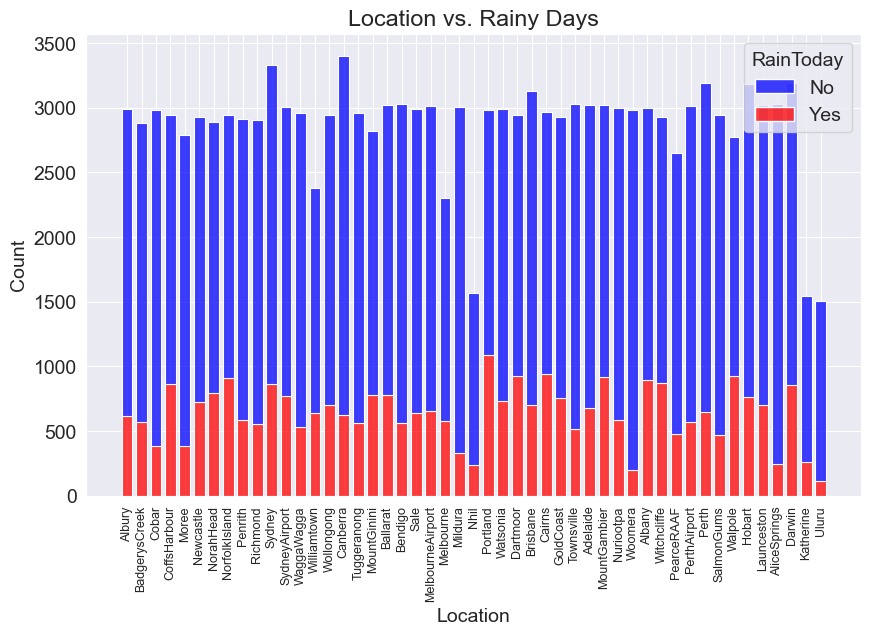

In [217]:
fig, ax = plt.subplots()
sns.histplot(data = raw_df,
             x = 'Location',
             hue = 'RainToday',
             multiple = 'stack',
             palette = ['blue', 'red'],
             shrink = 0.75,
             ax = ax)
ax.set_title('Location vs. Rainy Days')
plt.xticks(rotation=90,
           fontsize=9)
plt.show()

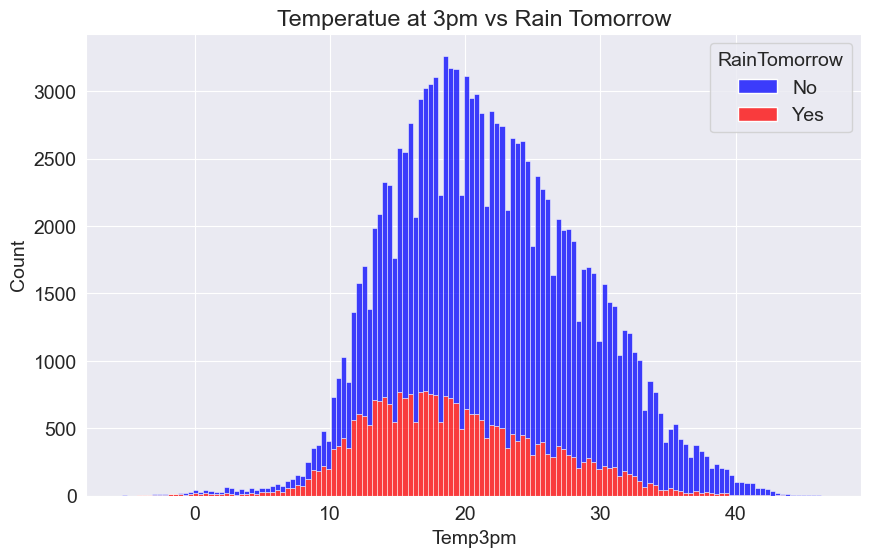

In [218]:
fig, ax = plt.subplots()
sns.histplot(data = raw_df,
             x = 'Temp3pm',
             hue = 'RainTomorrow',
             multiple = 'stack',
             palette = ['blue','red'],
             ax = ax)
ax.set_title('Temperatue at 3pm vs Rain Tomorrow')
plt.show()

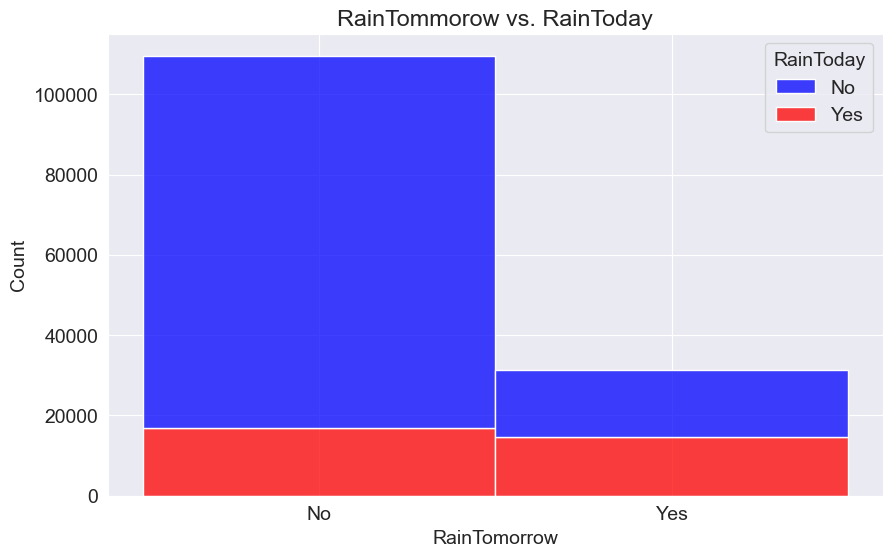

In [219]:
fig, ax = plt.subplots()
sns.histplot(data = raw_df,
             x = 'RainTomorrow',
             hue = 'RainToday',
             multiple = 'stack',
             palette = ['blue','red'],
             ax = ax)
ax.set_title('RainTommorow vs. RainToday')
plt.show()

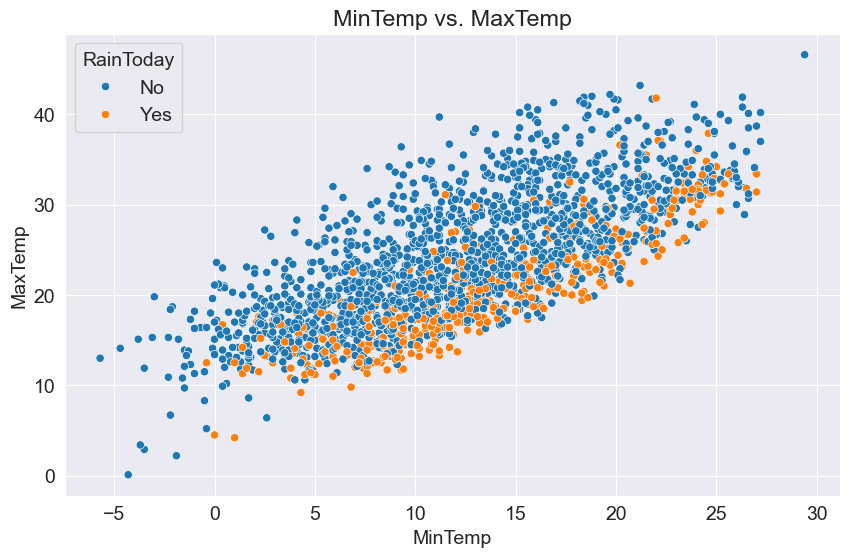

In [220]:
sns.scatterplot(data = raw_df.sample(2000),
                x = 'MinTemp',
                y = 'MaxTemp',
                hue = 'RainToday')
plt.title('MinTemp vs. MaxTemp')
plt.show()

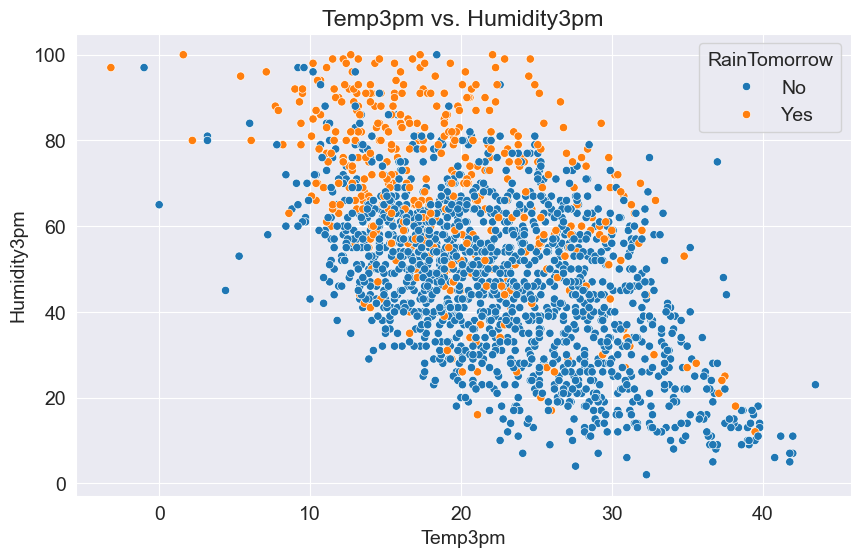

In [221]:
sns.scatterplot(data = raw_df.sample(2000),
                x = 'Temp3pm',
                y = 'Humidity3pm',
                hue = 'RainTomorrow')
plt.title('Temp3pm vs. Humidity3pm')
plt.show()

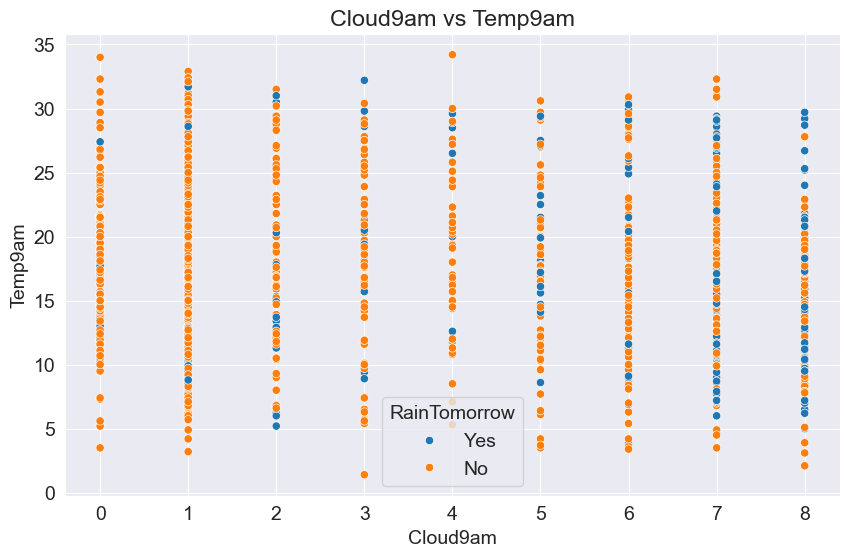

In [222]:
sns.scatterplot(data = raw_df.sample(2000),
                x = 'Cloud9am',
                y = 'Temp9am',
                hue = 'RainTomorrow')
plt.title('Cloud9am vs Temp9am')
plt.show()

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
train_val_df, test_df = train_test_split(raw_df,
                                         test_size = 0.2,
                                         random_state = 42)

In [225]:
train_df, val_df = train_test_split(train_val_df,
                                    test_size = 0.25,
                                    random_state = 42)

In [226]:
print('Training Data set shape:', train_df.shape)
print('Validation Data set shape:', val_df.shape)
print('Test Data set shape:', test_df.shape)

Training Data set shape: (84471, 23)
Validation Data set shape: (28158, 23)
Test Data set shape: (28158, 23)


For the current dataset, we can use the Date column in the dataset to create another column for year. We'll pick the last two years for the test set, and one year before it for the validation set.

<Axes: title={'center': 'Number of rows per year'}, xlabel='Date', ylabel='count'>

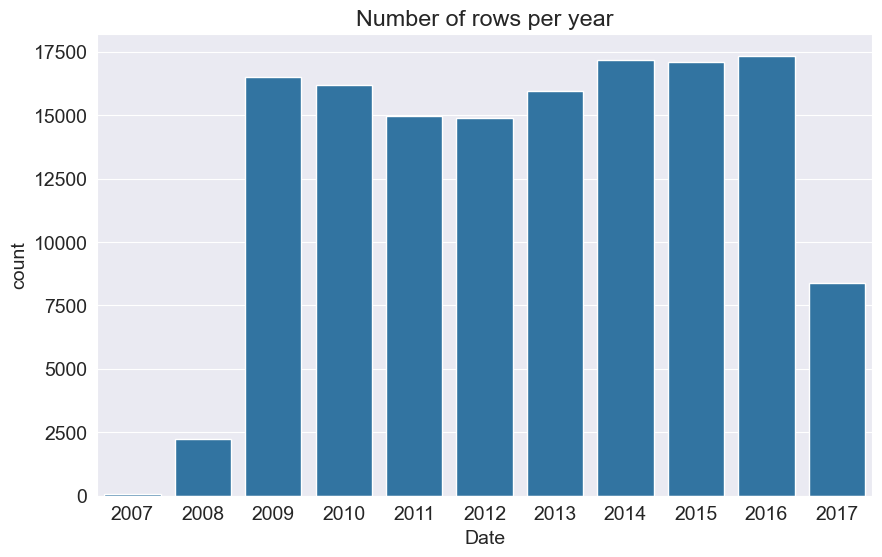

In [227]:
plt.title('Number of rows per year')
sns.countplot(x = pd.to_datetime(raw_df.Date).dt.year)

In [228]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [229]:
print('Training Data set shape:', train_df.shape)
print('Validation Data set shape:', val_df.shape)
print('Test Data set shape:', test_df.shape)

Training Data set shape: (97988, 23)
Validation Data set shape: (17089, 23)
Test Data set shape: (25710, 23)
